In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from SDOptimizer import SDOptimizer
plt.rcParams["figure.figsize"] = (10, 7)

DATA_FILE = "exportUSLab.csv"  # Points to the data Katie gave us
SDO = SDOptimizer()
SDO.load_data(DATA_FILE)

INFEASIBLE = [(3, 1, 4, 2)] # This represents an array we can't put a detector
source1 = SDO.get_time_to_alarm(False, False, infeasible_locations=INFEASIBLE) # the default value of flip is false, so this is simply included for clarity
source2 = SDO.get_time_to_alarm(True, False, infeasible_locations=INFEASIBLE) # flip about the x axis
source3 = SDO.get_time_to_alarm(False, True, infeasible_locations=INFEASIBLE) # flip about the x axis

smoke_sources = [source1, source2, source3]
bounds =  [0, 8.1, 0, 3.1]
initialization = [1.70799994, 1.89999998, 6.83200002, 1.89999998, 1.9, 1.4]

vals, locs, iterations = SDO.evaluate_optimization(smoke_sources, bounds, initialization, genetic=True, num_iterations=30)

The bounds are now [(0, 8.1), (0, 3.1), (0, 8.1), (0, 3.1), (0, 8.1), (0, 3.1)]
The locations are: (2.035, 1.519), (4.877, 2.721), (6.687, 1.885), 
The bounds are now [(0, 8.1), (0, 3.1), (0, 8.1), (0, 3.1), (0, 8.1), (0, 3.1)]
The locations are: (2.001, 1.466), (6.313, 1.202), (6.529, 1.544), 
The bounds are now [(0, 8.1), (0, 3.1), (0, 8.1), (0, 3.1), (0, 8.1), (0, 3.1)]
The locations are: (6.568, 1.524), (1.994, 1.467), (3.465, 0.398), 
The bounds are now [(0, 8.1), (0, 3.1), (0, 8.1), (0, 3.1), (0, 8.1), (0, 3.1)]
The locations are: (6.691, 1.857), (2.036, 1.525), (7.142, 1.403), 
The bounds are now [(0, 8.1), (0, 3.1), (0, 8.1), (0, 3.1), (0, 8.1), (0, 3.1)]
The locations are: (6.733, 1.851), (5.123, 1.469), (2.060, 1.462), 
The bounds are now [(0, 8.1), (0, 3.1), (0, 8.1), (0, 3.1), (0, 8.1), (0, 3.1)]
The locations are: (6.850, 1.946), (1.358, 0.205), (2.000, 1.500), 
The bounds are now [(0, 8.1), (0, 3.1), (0, 8.1), (0, 3.1), (0, 8.1), (0, 3.1)]
The locations are: (6.546, 1.567

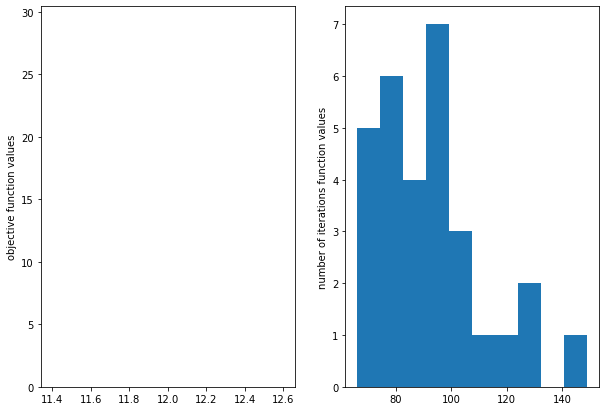

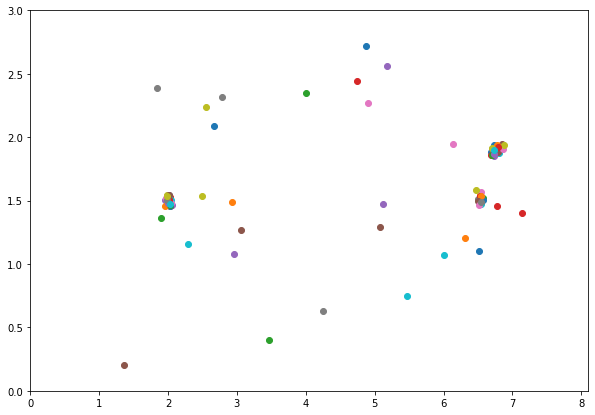

In [3]:
np.save("vals.npy", np.asarray(vals))
np.save("locs.npy", np.asarray(locs))
np.save("iterations.npy", np.asarray(iterations))

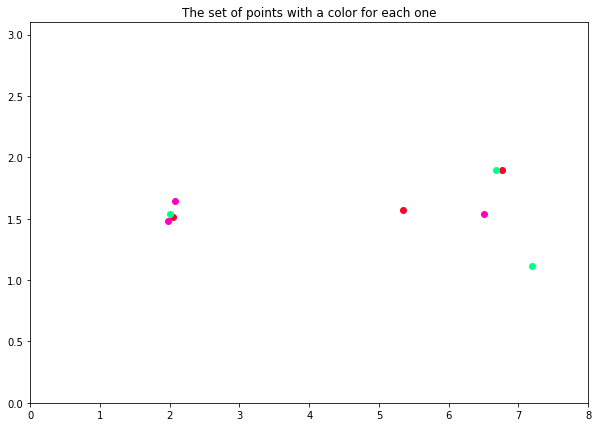

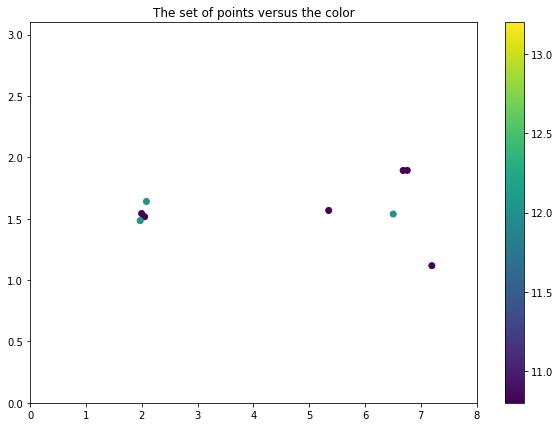

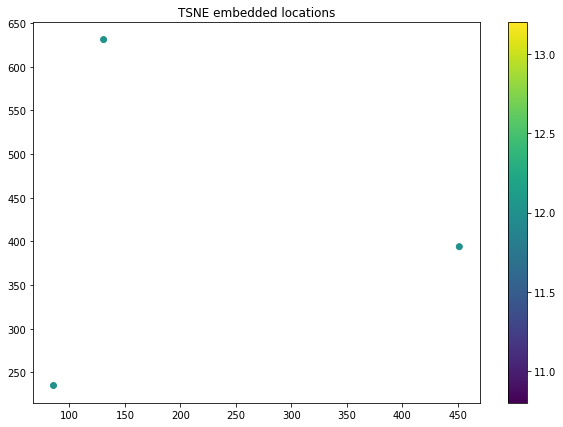

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib import cm
import seaborn as sns

vals = np.load("vals.npy")
locs = np.load("locs.npy")

num_points = len(locs)
colormapper = cm.get_cmap('gist_rainbow', num_points)
#clrs = sns.color_palette('hls', n_colors=num_points)  # a list of RGB tuples

for i, loc in enumerate(locs):
    plt.scatter(loc[::2], loc[1::2], c=[colormapper(i/float(num_points))])

plt.title("The set of points with a color for each one")
plt.ylim(0,3.1)
plt.xlim(0,8)
plt.show()
plt.cla()

for i, loc in enumerate(locs):
    color = np.ones_like(loc[::2]) * vals[i]
    plt.scatter(loc[::2], loc[1::2],c=color)

plt.title("The set of points versus the color")
plt.colorbar()
plt.ylim(0,3.1)
plt.xlim(0,8)
plt.show()
plt.cla()
    
embedded_locs = TSNE(n_components=2).fit_transform(locs)
plt.scatter(embedded_locs[:,0], embedded_locs[:,1], c=vals)
plt.colorbar()
plt.title("TSNE embedded locations")
plt.show()